## Import libraries

In [1]:
import sys
sys.path.append("/home/jovyan/work/sem-covid/")
sys.path = list(set(sys.path))
import os

os.getcwd()
os.chdir('/home/jovyan/work/sem-covid/')

import pandas as pd
from IPython.core.display import display
from sem_covid.services.store_registry import StoreRegistry
from pycaret.utils import check_metric
from pycaret.classification import *
import mlflow
from sem_covid import config

## Load dataset

In [2]:
feature_store = StoreRegistry.es_feature_store()
dataset_x = feature_store.get_features('fs_pwdb_tg1_x')
dataset_y = feature_store.get_features('fs_pwdb_tg1_y')

100% (1288 of 1288) |####################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (1288 of 1288) |####################| Elapsed Time: 0:00:00 Time:  0:00:00


## Split dataset in train_set and test_set

In [7]:
def py_caret_train_models(dataset_x: pd.DataFrame, dataset_y: pd.DataFrame):
    mlflow.set_tracking_uri(config.MLFLOW_TRACKING_URI)
    dataset = dataset_x
    for column in dataset_y.columns:
        dataset[column] = dataset_y[column].values
    train_data = dataset.sample(frac=0.70, random_state=786)
    test_data = dataset.drop(train_data.index)
    train_data.reset_index(inplace=True, drop=True)
    test_data.reset_index(inplace=True, drop=True)
    print('Data for Modeling: ' + str(train_data.shape))
    print('Unseen Data For Predictions: ' + str(test_data.shape))
    for class_name in dataset_y.columns:
        experiment = setup(data=train_data,
                           target=class_name,
                           log_experiment=True,
                           experiment_name=f"PyCaret_pwdb_{class_name}",
                           silent=True)
        best_model = compare_models()
        tuned_model = tune_model(best_model)
        final_model = finalize_model(tuned_model)
        test_predictions = predict_model(final_model, data=test_data)

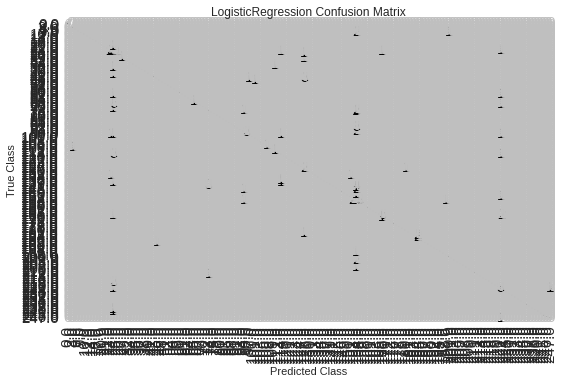

IndexError: index 221 is out of bounds for axis 0 with size 204

In [8]:
py_caret_train_models(dataset_x,dataset_y)